In [1]:
import pandas as pd

<h2>Loading the parquet file</h2>

<p>This line of code reads data from a Parquet file named "daily_weather.parquet" into a pandas DataFrame called daily_weather. Parquet is a columnar storage file format commonly used in big data processing frameworks like Apache Spark.</p>

In [2]:
daily_weather = pd.read_parquet("./daily_weather.parquet").drop_duplicates()

In [3]:
daily_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27614483 entries, 0 to 24220
Data columns (total 14 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   station_id              category      
 1   city_name               category      
 2   date                    datetime64[ns]
 3   season                  category      
 4   avg_temp_c              float64       
 5   min_temp_c              float64       
 6   max_temp_c              float64       
 7   precipitation_mm        float64       
 8   snow_depth_mm           float64       
 9   avg_wind_dir_deg        float64       
 10  avg_wind_speed_kmh      float64       
 11  peak_wind_gust_kmh      float64       
 12  avg_sea_level_pres_hpa  float64       
 13  sunshine_total_min      float64       
dtypes: category(3), datetime64[ns](1), float64(10)
memory usage: 2.6 GB


<p> The line above shows the DataFrame has a total of 27,614,483 entries (rows).
It has 14 columns.
Each column's name and its data type are listed.
The memory usage of the DataFrame is approximately 2.6 GB. </p>

In [4]:
daily_weather.city_name.unique()

['Asadabad', 'Fayzabad', 'Jalalabad', 'Kunduz', 'Qala i Naw', ..., 'Kasama', 'Livingstone', 'Mongu', 'Harare', 'Masvingo']
Length: 1235
Categories (1234, object): ['Aalborg', 'Abakan', 'Abha', 'Abidjan', ..., 'Ōita', 'Ōsaka', 'Şanlıurfa', 'Šibenik']

<p> In the code above, the method is used obtain an array of unique city names from the city_name column in the daily_weather DataFrame. .unique() is a pandas method that returns an array of unique values from the specified column </p>

In [5]:
daily_weather.head()

,station_id,city_name,date,season,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,avg_wind_speed_kmh,peak_wind_gust_kmh,avg_sea_level_pres_hpa,sunshine_total_min
0,41515,Asadabad,1957-07-01,Summer,27.0,21.1,35.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,41515,Asadabad,1957-07-02,Summer,22.8,18.9,32.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,41515,Asadabad,1957-07-03,Summer,24.3,16.7,35.6,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,41515,Asadabad,1957-07-04,Summer,26.6,16.1,37.8,4.1,NaN,NaN,NaN,NaN,NaN,NaN
4,41515,Asadabad,1957-07-05,Summer,30.8,20.0,41.7,0.0,NaN,NaN,NaN,NaN,NaN,NaN


<h2>Loading countries and cities data</h2>

In [6]:
countries = pd.read_csv("countries.csv")
cities = pd.read_csv("cities.csv")

In [7]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      214 non-null    object 
 1   native_name  213 non-null    object 
 2   iso2         213 non-null    object 
 3   iso3         214 non-null    object 
 4   population   210 non-null    float64
 5   area         207 non-null    float64
 6   capital      212 non-null    object 
 7   capital_lat  212 non-null    float64
 8   capital_lng  212 non-null    float64
 9   region       205 non-null    object 
 10  continent    206 non-null    object 
dtypes: float64(4), object(7)
memory usage: 18.5+ KB


In [8]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1245 entries, 0 to 1244
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   station_id  1245 non-null   object 
 1   city_name   1244 non-null   object 
 2   country     1245 non-null   object 
 3   state       1217 non-null   object 
 4   iso2        1239 non-null   object 
 5   iso3        1245 non-null   object 
 6   latitude    1245 non-null   float64
 7   longitude   1245 non-null   float64
dtypes: float64(2), object(6)
memory usage: 77.9+ KB


In [9]:
daily_weather.isna().sum()

station_id                       0
city_name                    13993
date                             0
season                           0
avg_temp_c                 6230907
min_temp_c                 5715834
max_temp_c                 5536533
precipitation_mm           6631532
snow_depth_mm             24187335
avg_wind_dir_deg          24168537
avg_wind_speed_kmh        22339089
peak_wind_gust_kmh        26492997
avg_sea_level_pres_hpa    23603562
sunshine_total_min        26593022
dtype: int64

<p>  This returns a DataFrame of the same shape as daily_weather with boolean values indicating whether each element is missing (True) or not missing (False). True indicates the presence of a missing value (NaN) in that particular cell. This method is then applied to the DataFrame returned by daily_weather.isna() to sum up the number of True values (i.e., missing values) in each column </p>

<h3>Dropping the columns with most null values</h3>

In [10]:
daily_weather.drop(columns=['peak_wind_gust_kmh','sunshine_total_min',
                            'snow_depth_mm','avg_wind_dir_deg',
                            'avg_wind_speed_kmh','avg_sea_level_pres_hpa'],inplace=True)

In [11]:
daily_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27614483 entries, 0 to 24220
Data columns (total 8 columns):
 #   Column            Dtype         
---  ------            -----         
 0   station_id        category      
 1   city_name         category      
 2   date              datetime64[ns]
 3   season            category      
 4   avg_temp_c        float64       
 5   min_temp_c        float64       
 6   max_temp_c        float64       
 7   precipitation_mm  float64       
dtypes: category(3), datetime64[ns](1), float64(4)
memory usage: 1.4 GB


<h2>Merging the weather and cities dataset on station_id and city_name</h2>

In [12]:
merged_df = pd.merge(daily_weather,cities, on = ['station_id','city_name'],how='left')

<p>In the code above, 
    pd.merge(): This is a pandas function used to merge DataFrames.
    daily_weather: This is the left DataFrame that you want to merge.
    cities: This is the right DataFrame that you want to merge.
    on=['station_id', 'city_name']: This parameter specifies the columns to join the DataFrames on. In this case,
    it joins them based on the 'station_id' and 'city_name' columns.
    how='left': This parameter specifies the type of join to perform. A left join (how='left') keeps all the rows
    from the left DataFrame (daily_weather) and only the matching rows from the right DataFrame (cities). If
    there's no match in the right DataFrame, NaN values will be filled in. </p>

In [13]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27635763 entries, 0 to 27635762
Data columns (total 14 columns):
 #   Column            Dtype         
---  ------            -----         
 0   station_id        object        
 1   city_name         object        
 2   date              datetime64[ns]
 3   season            category      
 4   avg_temp_c        float64       
 5   min_temp_c        float64       
 6   max_temp_c        float64       
 7   precipitation_mm  float64       
 8   country           object        
 9   state             object        
 10  iso2              object        
 11  iso3              object        
 12  latitude          float64       
 13  longitude         float64       
dtypes: category(1), datetime64[ns](1), float64(6), object(6)
memory usage: 2.9+ GB


In [14]:
merged_df.isna().sum()

station_id                0
city_name             13993
date                      0
season                    0
avg_temp_c          6230907
min_temp_c          5718229
max_temp_c          5539346
precipitation_mm    6642500
country                   0
state                546360
iso2                 130781
iso3                      0
latitude                  0
longitude                 0
dtype: int64

<h4>Dropping station_id because it is unique for each row/entry dropping it can help streamline the dataset and reduce redundancy</h4>

In [15]:
merged_df.drop('station_id',axis=1,inplace=True)

In [16]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27635763 entries, 0 to 27635762
Data columns (total 13 columns):
 #   Column            Dtype         
---  ------            -----         
 0   city_name         object        
 1   date              datetime64[ns]
 2   season            category      
 3   avg_temp_c        float64       
 4   min_temp_c        float64       
 5   max_temp_c        float64       
 6   precipitation_mm  float64       
 7   country           object        
 8   state             object        
 9   iso2              object        
 10  iso3              object        
 11  latitude          float64       
 12  longitude         float64       
dtypes: category(1), datetime64[ns](1), float64(6), object(5)
memory usage: 2.7+ GB


<h2>Merging countries and previous merged data</h2>

In [17]:
final_df = pd.merge(merged_df,countries,on=['country'],how='left')

In [18]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27635763 entries, 0 to 27635762
Data columns (total 23 columns):
 #   Column            Dtype         
---  ------            -----         
 0   city_name         object        
 1   date              datetime64[ns]
 2   season            category      
 3   avg_temp_c        float64       
 4   min_temp_c        float64       
 5   max_temp_c        float64       
 6   precipitation_mm  float64       
 7   country           object        
 8   state             object        
 9   iso2_x            object        
 10  iso3_x            object        
 11  latitude          float64       
 12  longitude         float64       
 13  native_name       object        
 14  iso2_y            object        
 15  iso3_y            object        
 16  population        float64       
 17  area              float64       
 18  capital           object        
 19  capital_lat       float64       
 20  capital_lng       float64       
 21  region

<AxesSubplot:>

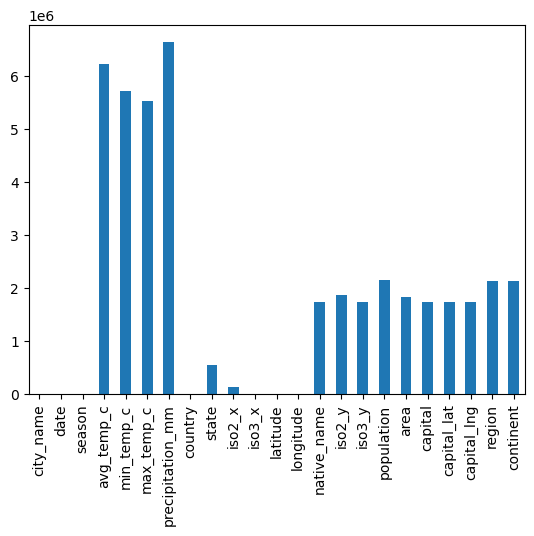

In [19]:
final_df.isna().sum().plot(kind="bar")

<p>Above, is the final_df graph for null values in the dataframe </p>

In [20]:
final_df.drop(columns=["native_name",'iso2_y','iso3_y','capital_lat','capital_lng','iso2_x','iso3_x'],inplace=True)

<AxesSubplot:>

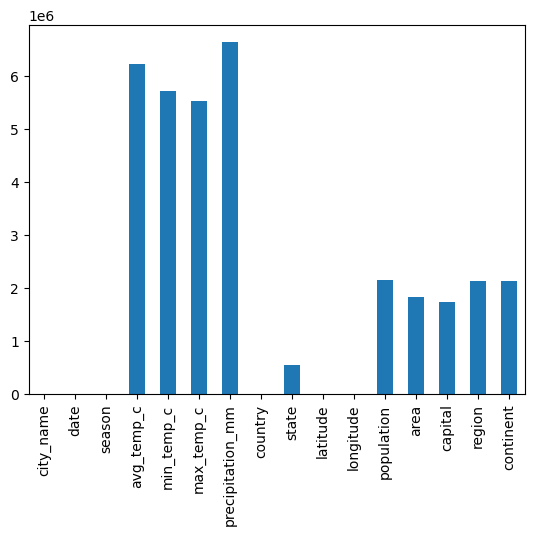

In [21]:
final_df.isna().sum().plot(kind="bar")

<h2>Dropping the rows with null values</h2>

In [22]:
final_df.dropna(subset=['avg_temp_c','precipitation_mm','population','area','continent','state','city_name','capital','region'],inplace=True)

In [23]:
final_df['min_temp_c'] = final_df['min_temp_c'].fillna(final_df['min_temp_c'].mean())

final_df['max_temp_c'] = final_df['max_temp_c'].fillna(final_df['max_temp_c'].median())

print(final_df.isna().sum())
print(final_df.shape)

city_name           0
date                0
season              0
avg_temp_c          0
min_temp_c          0
max_temp_c          0
precipitation_mm    0
country             0
state               0
latitude            0
longitude           0
population          0
area                0
capital             0
region              0
continent           0
dtype: int64
(13650356, 16)


In [24]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13650356 entries, 0 to 27635754
Data columns (total 16 columns):
 #   Column            Dtype         
---  ------            -----         
 0   city_name         object        
 1   date              datetime64[ns]
 2   season            category      
 3   avg_temp_c        float64       
 4   min_temp_c        float64       
 5   max_temp_c        float64       
 6   precipitation_mm  float64       
 7   country           object        
 8   state             object        
 9   latitude          float64       
 10  longitude         float64       
 11  population        float64       
 12  area              float64       
 13  capital           object        
 14  region            object        
 15  continent         object        
dtypes: category(1), datetime64[ns](1), float64(8), object(6)
memory usage: 1.6+ GB


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

<p> matplotlib.pyplot is a powerful plotting library for creating static, interactive, and animated visualizations in Python. It provides a MATLAB-like interface and is highly customizable. </p>

<h2>Correlation Matrix</h2>

<h4> The resulting heatmap visualizes the correlations between different numerical variables in the temp DataFrame. Each cell in the heatmap represents the correlation coefficient between two variables, with colors indicating the strength and direction of the correlation (e.g., positive correlation, negative correlation, or no correlation).</h4>

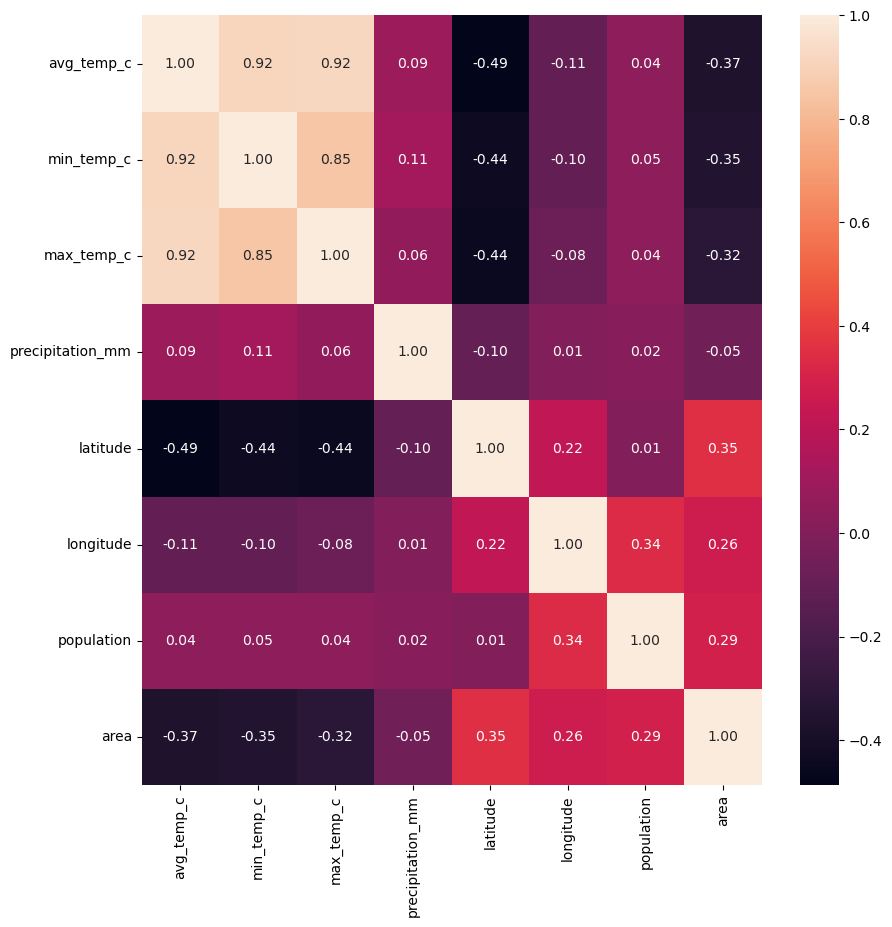

In [26]:
plt.figure(figsize=(10,10))
temp = final_df.drop(columns=['city_name','date','season','country','state','continent','region','capital'])
sns.heatmap(temp.corr(), annot=True, fmt=".2f")
plt.show()

<h2>Handling Categorical variables</h2>
<p>Using one-hot encoding</p>
<p>LabelEncoder is used to transform categorical labels into numerical labels. It assigns a unique integer to each unique category in the categorical variable. For example, if you have a categorical variable 'City' with categories 'New York', 'London', and 'Paris', LabelEncoder will transform them into 0, 1, and 2 </p>

In [27]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

In [28]:
final_df = pd.get_dummies(final_df, columns=['season'], drop_first=True)

final_df.head()

,city_name,date,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,country,state,latitude,longitude,population,area,capital,region,continent,season_Spring,season_Summer,season_Winter
0,Asadabad,1957-07-01,27.0,21.1,35.6,0.0,Afghanistan,Kunar,34.866,71.150005,26023100.0,652230.0,Kabul,Southern and Central Asia,Asia,0,1,0
1,Asadabad,1957-07-02,22.8,18.9,32.2,0.0,Afghanistan,Kunar,34.866,71.150005,26023100.0,652230.0,Kabul,Southern and Central Asia,Asia,0,1,0
2,Asadabad,1957-07-03,24.3,16.7,35.6,1.0,Afghanistan,Kunar,34.866,71.150005,26023100.0,652230.0,Kabul,Southern and Central Asia,Asia,0,1,0
3,Asadabad,1957-07-04,26.6,16.1,37.8,4.1,Afghanistan,Kunar,34.866,71.150005,26023100.0,652230.0,Kabul,Southern and Central Asia,Asia,0,1,0
4,Asadabad,1957-07-05,30.8,20.0,41.7,0.0,Afghanistan,Kunar,34.866,71.150005,26023100.0,652230.0,Kabul,Southern and Central Asia,Asia,0,1,0


<p>Handling categorical values using LabelEncoder</p>

In [29]:
final_df['region'] = le.fit_transform(final_df['region'])
final_df['continent'] = le.fit_transform(final_df['continent'])
final_df['capital'] = le.fit_transform(final_df['capital'])
final_df['country'] = le.fit_transform(final_df['country'])
final_df['state'] = le.fit_transform(final_df['state'])

final_df.head()

,city_name,date,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,country,state,latitude,longitude,population,area,capital,region,continent,season_Spring,season_Summer,season_Winter
0,Asadabad,1957-07-01,27.0,21.1,35.6,0.0,0,486,34.866,71.150005,26023100.0,652230.0,66,20,2,0,1,0
1,Asadabad,1957-07-02,22.8,18.9,32.2,0.0,0,486,34.866,71.150005,26023100.0,652230.0,66,20,2,0,1,0
2,Asadabad,1957-07-03,24.3,16.7,35.6,1.0,0,486,34.866,71.150005,26023100.0,652230.0,66,20,2,0,1,0
3,Asadabad,1957-07-04,26.6,16.1,37.8,4.1,0,486,34.866,71.150005,26023100.0,652230.0,66,20,2,0,1,0
4,Asadabad,1957-07-05,30.8,20.0,41.7,0.0,0,486,34.866,71.150005,26023100.0,652230.0,66,20,2,0,1,0


In [30]:
final_df.drop(columns=['population','area'],inplace=True)

In [31]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13650356 entries, 0 to 27635754
Data columns (total 16 columns):
 #   Column            Dtype         
---  ------            -----         
 0   city_name         object        
 1   date              datetime64[ns]
 2   avg_temp_c        float64       
 3   min_temp_c        float64       
 4   max_temp_c        float64       
 5   precipitation_mm  float64       
 6   country           int64         
 7   state             int64         
 8   latitude          float64       
 9   longitude         float64       
 10  capital           int64         
 11  region            int64         
 12  continent         int64         
 13  season_Spring     uint8         
 14  season_Summer     uint8         
 15  season_Winter     uint8         
dtypes: datetime64[ns](1), float64(6), int64(5), object(1), uint8(3)
memory usage: 1.5+ GB


In [32]:
final_df.isna().sum()

city_name           0
date                0
avg_temp_c          0
min_temp_c          0
max_temp_c          0
precipitation_mm    0
country             0
state               0
latitude            0
longitude           0
capital             0
region              0
continent           0
season_Spring       0
season_Summer       0
season_Winter       0
dtype: int64

In [33]:
final_df.to_csv("total_data_version_1.csv",index=False)